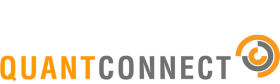
##Introduction to Financial Python [Tutorial 7]

##Métodos Numéricos
###Gustavo Alberto Puentes Romero

#Random Variables and Distributions

##Introducción
En el último capítulo aprendimos la definición de media y varianza, que son una especie de estimación puntual . La estimación puntual significa usar datos de muestra para calcular un valor único que debe servir como una "mejor estimación" de una población desconocida. Sin embargo, esto no es suficiente porque las estimaciones puntuales pueden ser engañosas. Necesitamos utilizar métodos más rigurosos para probar nuestras ideas. Es por eso que consideramos la distribución y la prueba de hipótesis. La distribución de variables aleatorias es la base para casi todos los temas financieros cuantitativos: regresión lineal, CAPM, Black-Scholes, árboles binomiales, pricing, etc.

##Variables aleatorias

Primero comencemos con el concepto de **variable aleatoria**. Una variable aleatoria se puede considerar como un dibujo de una distribución cuyo resultado antes del sorteo es incierto. Imagina tirar un dado, sabes que tu probabilidad de obtener cada uno es 1/6, pero no sabes cuál es el número de tu próxima tirada. Si tiramos los dados N veces y registramos el número de cada lanzamiento, una colección de esos números se llama **variable aleatoria discreta** . Una variable discreta puede tomar un número finito de valores. Para nuestro ejemplo, solo podemos tomar números de { 1,2,3,4,5,6 }. El otro tipo de variable es **variable aleatoria continua**. Una variable continua puede tomar cualquier valor en un rango determinado. Puede pensar en la tasa de rendimiento como una variable continua, teóricamente puede tomar cualquier valor de $(- ∞ , + ∞)$.

##Distribuciones

Cada variable aleatoria sigue una **distribución de probabilidad**, que es una función que puede pensarse que proporciona las probabilidades de ocurrencia de diferentes resultados posibles en un experimento. En nuestro ejemplo de los dados, la distribución de probabilidad de cada número es 1/6. Usualmente usamos $P(X)$ para representar una función de distribución de probabilidad, donde X es el valor de resultado. En nuestro ejemplo, $ P(1) = P(2) = P(3) = 1/6$. Sin embargo, no podemos usar esto para una distribución continua, porque la probabilidad de extraer un número específico de una variable continua es 0, debido a los infinitos resultados posibles que tenemos. En su lugar, usamos la **función de densidad de probabilidad** (PDF) para describir la probabilidad de que un valor esté en un rango específico. Cubrimos esto más tarde. Para cada función de distribución de probabilidad, tenemos una **función de distribución acumulativa** (CDF). Se define como $P( X≤x )$, que modela la probabilidad de que la variable aleatoria X tome un valor menor o igual que x. Para las variables aleatorias discretas, simplemente sumamos los valores menores o iguales a x y luego lo dividimos por el número de observaciones.

###Distribución uniforme

La distribución uniforme es el tipo más simple de distribución de probabilidad. Una distribución uniforme discreta tiene el mismo peso asignado a todos los resultados. Tanto tirar un dado como una moneda son distribuciones uniformes clásicas. Aquí usamos Python para simular lanzar un dado 10000 veces.

In [11]:
import random
import scipy
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#define a function to simulate rolling a dice
def dice():
    number=  [1,2,3,4,5,6]
    return random.choice(number)

series = np.array([dice() for x in range(10000)])
print (series)

[4 3 6 ... 3 4 3]


Creamos una serie de variables aleatorias aquí. Podemos trazar los valores en el eje x y poner su número de ocurrencias en el eje y para tener una vista directa de la distribución:

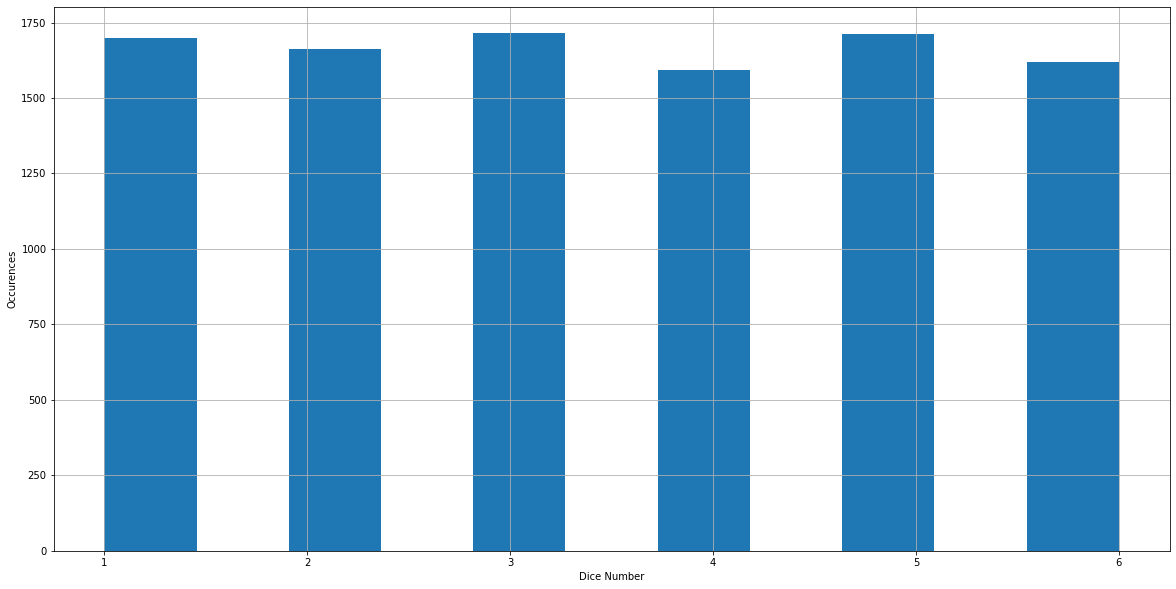

In [2]:
plt.figure(figsize = (20,10))
plt.hist(series,bins = 11,align = 'mid')
plt.xlabel('Dice Number')
plt.ylabel('Occurences')
plt.grid()
plt.show()

Digamos que queremos saber la frecuencia con la que las observaciones son menores o iguales a 3. En otras palabras, queremos buscar el valor de $P(X≤ 3)$.

In [3]:
print (len([x for x in series if x <= 3])/float(len(series)))
print (np.mean(series))

0.5076
3.4815


$P(X≤ 3)$ está muy cerca de 0,5. Esto no es sorprendente porque tiramos los dados 1000 veces y la frecuencia con la que las observaciones son menores o iguales a 3 debe estar cerca de la probabilidad real, que es 0.5. Para una distribución uniforme dada, es sencillo calcular su media: es el centro de la distribución porque cada resultado tiene el mismo peso. Para nuestro ejemplo de dados, podemos pensar en ello como

$$ \mu = (1 + 2 + 3 + 4 + 5 + 6)/6 = 3,5 $$
$$ó$$
$$ mi(x) = 1 * \frac{1}{6} + 2* \frac{1}{6} + . . . + 6 * \frac{1}{6} = 3,5$$

De manera más general, si a asumimos que el valor mínimo en una distribución uniforme es a y el valor máximo es b, la media puede estar dada por:

$$\bar{u} = \frac{a+b}{2}$$

Usualmente usamos $\bar{u}$, representa la **media de la población**, o la "media real". Aquí creamos una muestra con 1000 observaciones, la media que calculamos anteriormente es la **media de la muestra**. La media de la muestra por lo general no es igual a la media teórica de la población a menos que el número de observaciones se acerque al infinito. La varianza viene dada por:

$$ \sigma^2 = \frac{(b - a)^2}{12}$$

Deducir la fórmula está fuera del alcance de nuestra conferencia. Es útil darse cuenta de que para una distribución estándar dada, podemos formular su media y varianza.

###Distribución binomial

Una distribución binomial es una distribución de probabilidad discreta del número de éxitos en una secuencia de n experimentos independientes. Supongamos que el mercado tiene un 50% de probabilidad de que suba y el 50% de probabilidad baje, y lo observamos en los próximos 10 días, ¿cuál es la distribución del número de días que sube? Este es un ejemplo de distribución binomial. En general, si realizamos el experimento n veces, y cada resultado es independiente, con la misma probabilidad de éxito p, la probabilidad de obtener exactamente k éxitos viene dada por la función:

$$P(X = K) = C_n^k p^k (1 - p)^{n - k}$$

Donde

$$C_n^k = \frac{n!}{(n-k)! k!}$$

Bajo tal circunstancia decimos que X sigue la distribución binomial $X∼ B$ $(n , p)$. Simulemos un experimento binomial con una tasa de éxito p = 0,7 y un experimento multiplicado por n = 10



In [4]:
def trial():
    number = [1,2,3,4,5,6,7,8,9,10]
    a = random.choice(number)
    if a<= 7:
        return 1
    else:
        return 0

Cada vez que ejecutamos trial(), hicimos un experimento. Si tiene éxito, devolverá 1, de lo contrario, devolverá 0. Ahora vamos a hacer el experimento 10 veces:

In [5]:
res = [trial() for x in range(10)]
print (sum(res))

9


Ahora hicimos el experimento 10 veces y el número de éxitos es suma (res). Sin embargo, solo significa que durante estos 10 experimentos logramos sumar (res) veces. Si queremos ver la distribución binomial, necesitamos experimentar N veces. Cuando n es lo suficientemente grande, nuestra frecuencia se acercará a la probabilidad teórica. Aquí simulamos cada resultado 10000 veces:

In [6]:
def binomial(number):
    l = []
    for i in range(10000):
        res = [trial() for x in range(10)]
        l.append(sum(res))
    return len([x for x in l if x == number])/float(len(l))
print (binomial(8))

0.233


El número impreso arriba es la probabilidad simulada de que tengamos éxito 8 veces si experimentamos 10 veces. Para cada resultado posible, simulamos la probabilidad:

In [7]:
prob = []
for i in range(1,11):
    prob.append(binomial(i))
prob_s = pd.Series(prob,index = range(1,11))
print (prob_s)

1     0.0002
2     0.0013
3     0.0080
4     0.0348
5     0.0976
6     0.1957
7     0.2576
8     0.2383
9     0.1191
10    0.0265
dtype: float64


Aquí tenemos el resultado simulado de la distribución binomial. Ahora vamos a comprobar si las frecuencias simuladas se acercan lo suficiente a las probabilidades teóricas. Tomemos X = 7 y X = 8 como ejemplo:

In [8]:
print ((float(math.factorial(10))/(math.factorial(7)*math.factorial(10-7)))*(0.7**7)*(0.3**3))

print ((float(math.factorial(10))/(math.factorial(8)*math.factorial(10-8)))*(0.7**8)*(0.3**2))

0.2668279319999998
0.23347444049999988


Como podemos ver, los resultados simulados se acercan bastante a la probabilidad real. podemos trazar los resultados de la siguiente manera:

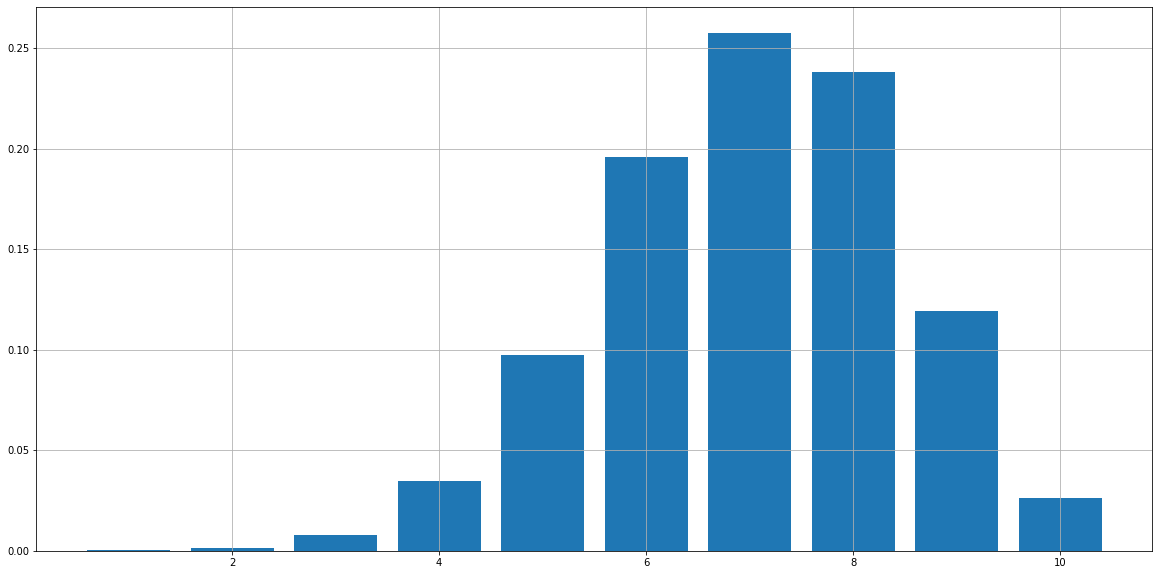

In [9]:
plt.figure(figsize = (20,10))
plt.bar(range(1,11),prob)
plt.grid()
plt.show()

Otra buena propiedad de la distribución binomial es que su media y varianza son bastante simples:

$$\bar{u} = np$$
$$\sigma^2 = np(1 - P)$$

No presentaremos la deducción aquí, pero si está interesado en ella, lo alentamos a que lo haga usted mismo, en función de las funciones de probabilidad que proporcionamos anteriormente.

###Distribución normal
Antes de analizar la distribución normal, hablemos primero de la distribución continua. Como mencionamos anteriormente, usamos una f**unción de densidad de probabilidad** (PDF) para modelar la probabilidad de que nuestro valor se tome en un rango específico. Lo definimos como:

$$PAG(a < X < b) = \int_{a}^{b} F_X( x ) dX$$

Ahora podemos hablar de la distribución normal. La **distribución normal** es la **distribución** más utilizada en las ciencias naturales, por supuesto también en la investigación financiera. El PDF de distribución normal se proporciona de la siguiente manera:

$$F( x ) = \frac{1}{\sqrt{2 \pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

Dónde $\mu$ es la media de la distribución normal, y $\sigma$ es la desviación estándar.

Generalmente, si una variable aleatoria X sigue una distribución normal, la representamos por $X∼ N( \mu ,\sigma^2)$. Específicamente, si una distribución normal tiene una media de 0 y una desviación estándar, la llamamos **distribución normal estándar**. Ahora simulemos una distribución normal estándar usando paquetes de Python para ver cómo se ve:

In [21]:
plt.figure(figsize = (20,10))
#norm.plot.density()
plt.show()

<Figure size 1440x720 with 0 Axes>

Los datos financieros están muy desordenados y se considera que tienen mucho ruido. La mayoría de las veces creemos que ese ruido sigue una distribución normal. También se cree ampliamente que el rendimiento de un activo durante un corto período de tiempo sigue una distribución normal. Comprobémoslo con las tasas de rendimiento logarítmicas diarias de SPY:

In [26]:
!pip install quandl
import quandl
quandl.ApiConfig.api_key = 'tnCnvFmEqC5qH9fr-2Ey'
spy_table = quandl.get('WIKI/AAPL')
spy = spy_table.loc['2015':'2021',['Open','Close']]
spy['log_return'] = np.log(spy.Close).diff()
spy = spy.dropna()

Calculamos el rendimiento diario logarítmico del índice WIKI/AAPL 500 desde 2009 hasta el presente. Primero echemos un vistazo a cómo se ven los datos de retorno de la serie temporal:

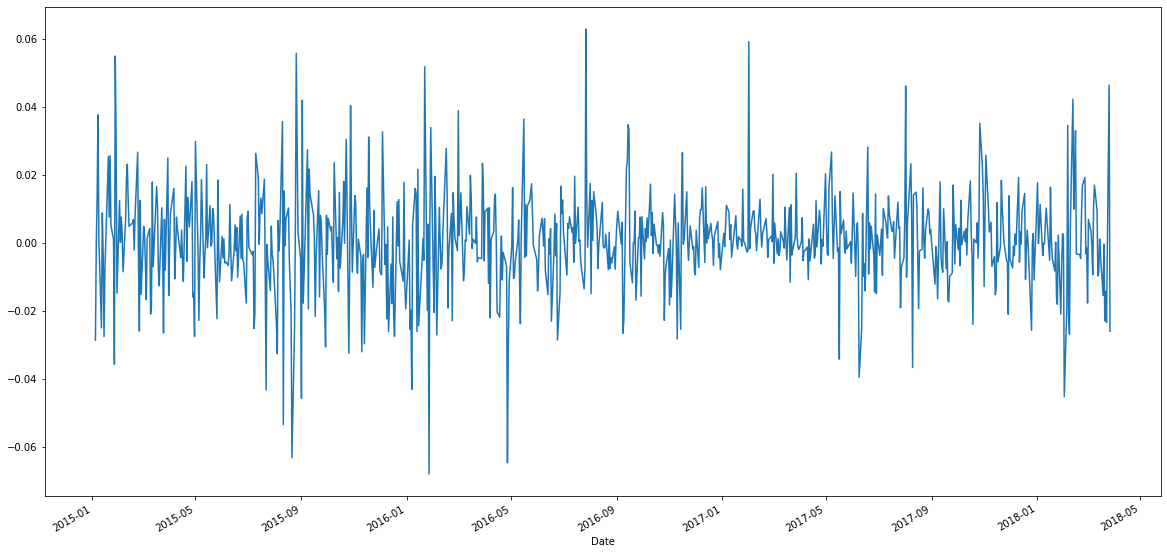

In [27]:
plt.figure(figsize = (20,10))
spy.log_return.plot()
plt.show()

Este es un gráfico de rendimiento diario clásico. Tracemos ahora la gráfica de densidad de los rendimientos:

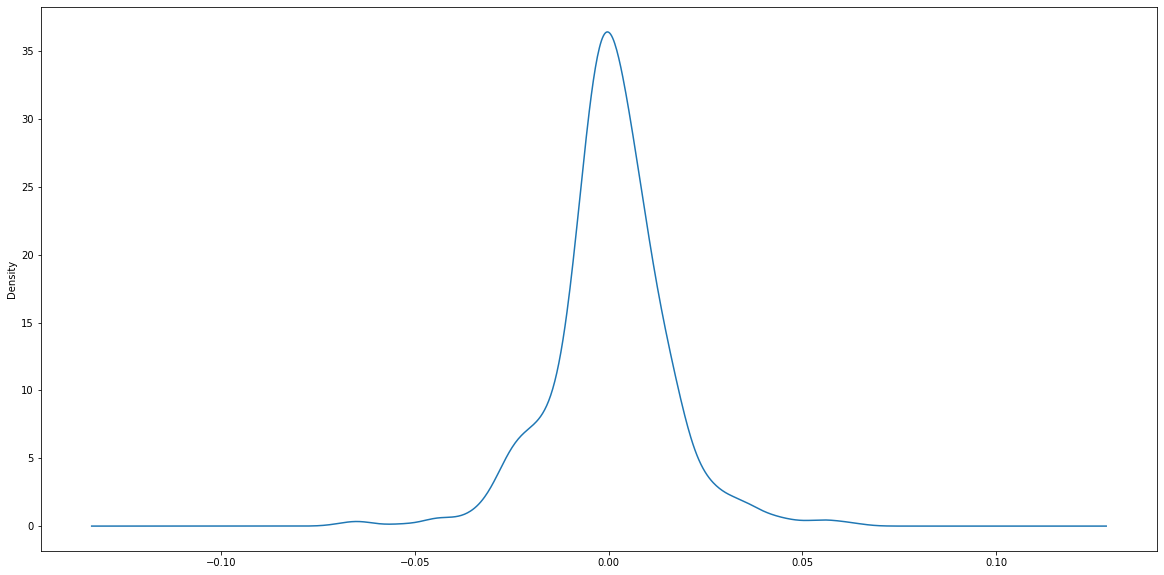

In [28]:
plt.figure(figsize = (20,10))
spy.log_return.plot.density()
plt.show()

Si observamos el eje $x$ y el eje $y$ cuidadosamente, podemos ver que el rendimiento del activo no es una distribución normal estándar. El pico de la gráfica de distribución normal estándar es de alrededor de 0,4, mientras que en este gráfico está por encima de 0,8. Esto se debe a que la desviación estándar $\sigma$ del rendimiento obviamente no es 1. Podemos demostrar la distribución normal con diferentes medias y varianzas mediante simulación:

<Figure size 1440x720 with 0 Axes>

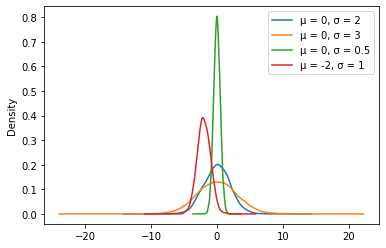

In [29]:
de_2 = pd.Series(np.random.normal(0,2,10000),name = 'μ = 0, σ = 2')
de_3 = pd.Series(np.random.normal(0,3,10000),name = 'μ = 0, σ = 3')
de_0 = pd.Series(np.random.normal(0,0.5,10000), name ='μ = 0, σ = 0.5')
mu_1 = pd.Series(np.random.normal(-2,1,10000),name ='μ = -2, σ = 1')
df = pd.concat([de_2,de_3,de_0,mu_1],axis = 1)
plt.figure(figsize=(20,10))
df.plot.density()
plt.show()

#Resumen
En este capítulo presentamos la variable aleatoria, la diferencia entre la distribución aleatoria discreta y la distribución aleatoria continua y lo más importante, la distribución normal.